# Exploratory Analysis and Data Cleaning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import os.path

# Reading the data from yelp_academic_dataset_business.csv file.

In [ ]:
business = pd.read_csv('yelp_dataset_data/yelp_academic_dataset_business.csv')

In [4]:
business.head()

,business_id,attributes.Smoking,hours.Saturday,attributes.GoodForDancing,attributes.DriveThru,attributes.WiFi,hours.Monday,hours,postal_code,attributes.BYOB,...,attributes.RestaurantsGoodForGroups,attributes.AcceptsInsurance,attributes.BestNights,attributes.CoatCheck,attributes.RestaurantsTableService,attributes.Ambience,attributes.HairSpecializesIn,attributes.DietaryRestrictions,attributes.RestaurantsPriceRange2,attributes.RestaurantsDelivery
0,Pns2l4eNsfO8kk83dixA6A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93101,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,NaN,8:0-14:0,NaN,NaN,NaN,0:0-0:0,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",63123,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,NaN,8:0-23:0,NaN,NaN,u'no',8:0-22:0,"{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",85711,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,2,False
3,MTSW4McQd7CbVtyjqoe9mw,NaN,7:0-21:0,NaN,NaN,u'free',7:0-20:0,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",19107,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False
4,mWMc6_wTdE0EUBKIGXDVfA,NaN,12:0-22:0,NaN,NaN,NaN,NaN,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",18054,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Stars attribute

In [6]:
business.stars.value_counts()

4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: stars, dtype: int64

In [7]:
business.stars = business.stars.astype('category')

In [8]:
business.stars.describe()

count     150346.0
unique         9.0
top            4.0
freq       31125.0
Name: stars, dtype: float64

## Restricting to only open businesses.

In [12]:
business = business[business.is_open == 1]

## Exploring the State attribute

In [13]:
business.state.value_counts()

PA     26289
FL     21540
TN      9600
IN      8946
MO      8363
AZ      8108
LA      7676
NJ      7031
NV      6277
AB      4346
CA      4065
ID      3783
DE      1894
IL      1765
TX         4
WA         2
MA         2
HI         1
UT         1
CO         1
MI         1
SD         1
XMS        1
VT         1
Name: state, dtype: int64

### Problem 1 - More than 50 states

In [15]:
true_states = pd.read_csv('state_table.csv')

In [16]:
true_states.head()

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,1,Alabama,AL,USA,state,10,current,occupied,NaN,1.0,Ala.,IV,3.0,South,6.0,East South Central,11
1,2,Alaska,AK,USA,state,10,current,occupied,NaN,2.0,Alaska,X,4.0,West,9.0,Pacific,9
2,3,Arizona,AZ,USA,state,10,current,occupied,NaN,4.0,Ariz.,IX,4.0,West,8.0,Mountain,9
3,4,Arkansas,AR,USA,state,10,current,occupied,NaN,5.0,Ark.,VI,3.0,South,7.0,West South Central,8
4,5,California,CA,USA,state,10,current,occupied,NaN,6.0,Calif.,IX,4.0,West,9.0,Pacific,9


In [17]:
true_states = true_states[['name','abbreviation','country','census_region','census_division']]
#true_states

In [18]:
true_states = true_states.rename(index=str, columns={"name" : "state_full", "abbreviation" : "true_state"})

In [19]:
true_states.head()

,state_full,true_state,country,census_region,census_division
0,Alabama,AL,USA,3.0,6.0
1,Alaska,AK,USA,4.0,9.0
2,Arizona,AZ,USA,4.0,8.0
3,Arkansas,AR,USA,3.0,7.0
4,California,CA,USA,4.0,9.0


In [20]:
business = pd.merge(business, true_states, left_on='state', right_on='true_state', how='left')
# merging the business dataset with real statetable for data correction.

In [21]:
business.head()

,business_id,attributes.Smoking,hours.Saturday,attributes.GoodForDancing,attributes.DriveThru,attributes.WiFi,hours.Monday,hours,postal_code,attributes.BYOB,...,attributes.Ambience,attributes.HairSpecializesIn,attributes.DietaryRestrictions,attributes.RestaurantsPriceRange2,attributes.RestaurantsDelivery,state_full,true_state,country,census_region,census_division
0,mpf3x-BjTdTEA3yCZrAYPw,NaN,8:0-14:0,NaN,NaN,NaN,0:0-0:0,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",63123,NaN,...,NaN,NaN,NaN,NaN,NaN,Missouri,MO,USA,2.0,4.0
1,MTSW4McQd7CbVtyjqoe9mw,NaN,7:0-21:0,NaN,NaN,u'free',7:0-20:0,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",19107,NaN,...,NaN,NaN,NaN,1,False,Pennsylvania,PA,USA,1.0,2.0
2,mWMc6_wTdE0EUBKIGXDVfA,NaN,12:0-22:0,NaN,NaN,NaN,NaN,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",18054,NaN,...,NaN,NaN,NaN,NaN,NaN,Pennsylvania,PA,USA,1.0,2.0
3,CF33F8-E6oudUQ46HnavjQ,NaN,9:0-22:0,NaN,True,u'no',0:0-0:0,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",37015,NaN,...,None,NaN,NaN,1,True,Tennessee,TN,USA,3.0,6.0
4,n_0UpQx1hsNbnPUSlodU8w,NaN,10:0-18:0,NaN,NaN,NaN,0:0-0:0,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",63144,NaN,...,NaN,NaN,NaN,2,NaN,Missouri,MO,USA,2.0,4.0


In [22]:
business[business.true_state.isna()][['address','city', 'state']].head(15)

,address,city,state
78592,95a Mount Pleasant,Liverpool,XMS


In [23]:
business = business[pd.notnull(business.true_state)]

In [24]:
business.country.value_counts()

USA       115351
Canada      4346
Name: country, dtype: int64

# Restricting the business country only related to USA.

In [25]:
#Data reduction - Restricting the business country only related to USA.
business = business[business.country == 'USA']

In [27]:
business = business.drop(['state_full','true_state','country'], axis=1)

### Problem 2 - Wrong City/State combination

In [28]:
# This file "uscitiesv1.4.csv" contains the correct city-state data in USA.
cities = pd.read_csv('uscitiesv1.4.csv')

In [29]:
cities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659


In [30]:
cities.city = cities.city.str.lower()
cities = cities.drop(['city_ascii','county_fips','lat','lng','source','incorporated','timezone','id'], axis=1)
business.city = business.city.str.lower()
business = pd.merge(business, cities, left_on=['city','state'], right_on=['city','state_id'], how='left')

In [37]:
business[business.state == 'AZ'][['city','state_id','state']]

,city,state_id,state
12,tucson,AZ,AZ
39,tucson,AZ,AZ
45,tucson,AZ,AZ
76,oro valley,AZ,AZ
91,tucson,AZ,AZ
...,...,...,...
115302,tucson,AZ,AZ
115317,tucson,AZ,AZ
115321,tucson,AZ,AZ
115337,oro valley,AZ,AZ


In [38]:
business = business[pd.notnull(business.state_id)]
business = business.drop(['state_id'], axis=1)

In [40]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 115350
Data columns (total 68 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   business_id                            106810 non-null  object  
 1   attributes.Smoking                     3130 non-null    object  
 2   hours.Saturday                         78781 non-null   object  
 3   attributes.GoodForDancing              3048 non-null    object  
 4   attributes.DriveThru                   6219 non-null    object  
 5   attributes.WiFi                        37812 non-null   object  
 6   hours.Monday                           84665 non-null   object  
 7   hours                                  92456 non-null   object  
 8   postal_code                            106789 non-null  object  
 9   attributes.BYOB                        3651 non-null    object  
 10  hours.Thursday                         91204

## Review_count Attribute

C:\Users\Checkout\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


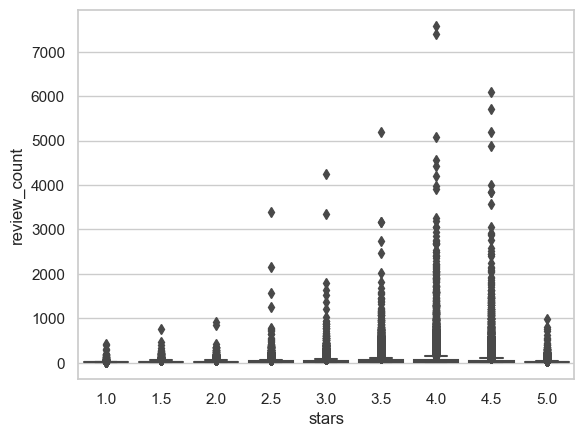

In [45]:
sns_plot = sns.boxplot(x = "stars", y = "review_count", data=business)
sns_plot.figure.savefig("review-count_stars.png")

In [47]:
business.review_count.quantile([.75, .9, .95, .99, .999, .9999])

0.7500      38.0000
0.9000     105.0000
0.9500     190.0000
0.9900     520.0000
0.9990    1642.7640
0.9999    4220.7213
Name: review_count, dtype: float64

In [48]:
business.review_count.skew()

15.688225641686104

In [49]:
business.sort_values(by=['review_count'], ascending=False).iloc[0]

business_id                                             _ab50qdWOk0DdB6XOrBitw
attributes.Smoking                                                         NaN
hours.Saturday                                                       11:0-22:0
attributes.GoodForDancing                                                  NaN
attributes.DriveThru                                                       NaN
                                                   ...                        
county_name                                                            Orleans
population                                                           1024421.0
population_proper                                                     391495.0
density                                                                  892.0
zips                         70139 70130 70131 70114 70115 70116 70117 7011...
Name: 87264, Length: 68, dtype: object

C:\Users\Checkout\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


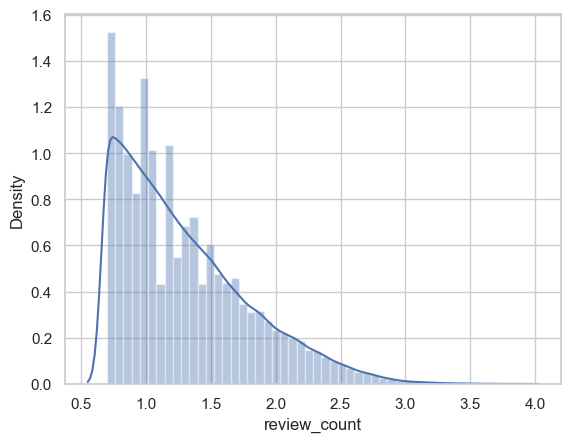

In [50]:
sns_plot = sns.distplot(np.log10(business.review_count))
sns_plot.figure.savefig("review-count_density.png")

C:\Users\Checkout\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


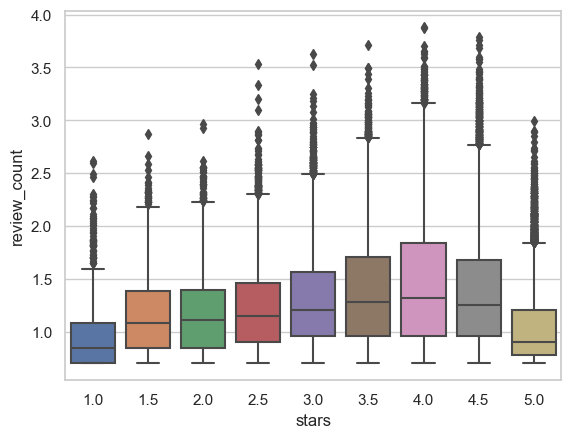

In [51]:
sns_plot = sns.boxplot(x=business.stars, y=np.log10(business.review_count))
sns_plot.figure.savefig("review-count_boxplot.png")

In [52]:
np.log10(business.review_count).skew()

0.9791645464388095

In [53]:
business.stars.corr(business.review_count)

0.05712252811463251

In [54]:
business.stars.corr(np.log10(business.review_count))

0.042472837437720935

In [55]:
business.review_count = np.log10(business.review_count)

In [56]:
business.review_count.isnull().value_counts()

False    106810
Name: review_count, dtype: int64

## Business "name" attribute

In [57]:
business.name.head()

0               The UPS Store
1          St Honore Pastries
2    Perkiomen Valley Brewery
3              Sonic Drive-In
4             Famous Footwear
Name: name, dtype: object

In [59]:
business.name = business.name.str.lower()

## Postal_code attribute

In [67]:
business.postal_code.head()

0    63123
1    19107
2    18054
3    37015
4    63144
Name: postal_code, dtype: object

In [69]:
business[business.postal_code.isnull()][['name','address', 'city', 'state']].head()

,name,address,city,state
12666,philadelphia,NaN,philadelphia,PA
13657,indy 500 parade,Pennsylvania St,indianapolis,IN
15123,krewe of choctaw,NaN,gretna,LA
22860,krewe of thoth,St Charles Ae,new orleans,LA
24914,indy pies and pints with arts 4 learning,NaN,indianapolis,IN


In [70]:
business[pd.notnull(business.address) & business.postal_code.isnull()][['name','address', 'city', 'state']].head()

,name,address,city,state
13657,indy 500 parade,Pennsylvania St,indianapolis,IN
22860,krewe of thoth,St Charles Ae,new orleans,LA
48245,indy burger battle,W Georgia St,indianapolis,IN
73732,carvana clearwater,US-19,clearwater,FL
82207,deer creek park,North Laclede Station Rd,maplewood,MO


In [71]:
#Replacing all NaN values with 'NOT_AVAILABLE'
business.postal_code = business.postal_code.fillna('NOT_AVAILABLE')
business.postal_code = business.postal_code.str.lower()


In [73]:
business.postal_code.isnull().value_counts()

False    106810
Name: postal_code, dtype: int64

## Categories attribute

In [74]:
business.categories.head()

0    Shipping Centers, Local Services, Notaries, Ma...
1    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
2                            Brewpubs, Breweries, Food
3    Burgers, Fast Food, Sandwiches, Food, Ice Crea...
4    Sporting Goods, Fashion, Shoe Stores, Shopping...
Name: categories, dtype: object

In [76]:
business[business.categories.isnull()][['name','city','state']].head()

,name,city,state
1455,a a berlin glass & mirror co,berlin,NJ
1699,pauline african hair braiding & weaving,saint ann,MO
2504,luxury perfume,reno,NV
2522,certegy payment services,saint petersburg,FL
3516,green envy,saint charles,MO


In [77]:
#Data reduction - dropped categories which were null.
business = business[pd.notnull(business.categories)]
business.categories = business.categories.str.lower()

In [79]:
business.categories.str.contains('restaurant|food').value_counts()

False    67673
True     39048
Name: categories, dtype: int64

In [80]:
#Data reduction - Restricting categories only related to restaurant and food.
business = business[business.categories.str.contains('restaurant|food')]

## Checking for Latitude and Longitude Attributes

In [81]:
business.latitude.isnull().value_counts()

False    39048
Name: latitude, dtype: int64

In [82]:
business.longitude.isnull().value_counts()

False    39048
Name: longitude, dtype: int64

In [83]:
business[business.longitude.isnull()]['latitude']

Series([], Name: latitude, dtype: float64)

In [84]:
business[business.latitude.isnull()]['longitude']

Series([], Name: longitude, dtype: float64)

In [85]:
business = business[pd.notnull(business.latitude) & pd.notnull(business.longitude)]

In [86]:
business[['latitude','longitude']].describe()

,latitude,longitude
count,39048.000000,39048.000000
mean,36.115335,-87.295052
std,4.949144,13.440985
min,27.564457,-120.083748
25%,30.020253,-90.127570
50%,38.761787,-82.843728
75%,39.949119,-75.359180
max,43.773686,-74.661348


In [87]:
# https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States
# Restricting the geolocation data only to USA using lat and long attributes.
top = 49.3457868 # top lat
bottom =  24.7433195 # bottom lat
left = -124.7844079 # left long
right = -66.9513812 # right long


In [88]:
business[(business.latitude > top) | (business.latitude < bottom) | (business.longitude > right) | (business.longitude < left)][['name','city','state']]

,name,city,state


In [89]:
business = business[(business.latitude <= top) & (business.latitude >= bottom) & (business.longitude<=right) & (business.longitude>=left)]

## Checking for Address attribute

In [90]:
business.address.isnull().value_counts()

False    38537
True       511
Name: address, dtype: int64

In [91]:
business[business.address.isnull()][['name','address','city','state']].head()

,name,address,city,state
65,impasto,NaN,tampa,FL
196,scout's treat truck,NaN,indianapolis,IN
223,best tours,NaN,philadelphia,PA
242,go! gyro! go!,NaN,saint louis,MO
330,taste of the caribbean,NaN,indianapolis,IN


In [92]:
# The above head() shows that there are address with NaN values. The conclusion drawn is that these are food trucks and stuff. 
# So, marking the address for these as 'Not_Available'
business.address = business.address.fillna('NOT_AVAILABLE')

In [94]:
business.address = business.address.str.lower()
business.address.isnull().value_counts()

False    39048
Name: address, dtype: int64

In [96]:
# reading and fetching all users who gave tips for the restaurants.
tip = pd.read_csv('yelp_dataset_data/yelp_academic_dataset_tip.csv')
tip.head()

,text,date,business_id,user_id,compliment_count
0,Avengers time with the ladies.,2012-05-18 02:17:21,3uLgwr0qeCNMjKenHJwPGQ,AGNUgVwnZUey3gcPCJ76iw,0
1,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,QoezRbYQncpRqyrLH6Iqjg,NBN4MgHP9D3cw--SnauTkA,0
2,It's open even when you think it isn't,2013-08-18 00:56:08,MYoRNLb5chwjQe3c_k37Gg,-copOvldyKh1qr-vzkDEvw,0
3,Very decent fried chicken,2017-06-27 23:05:38,hV-bABTK-glh5wj31ps_Jw,FjMQVZjSqY8syIO-53KFKw,0
4,Appetizers.. platter special for lunch,2012-10-06 19:43:09,_uN0OudeJ3Zl_tf6nxg5ww,ld0AperBXk1h6UbqmM80zw,0


In [97]:
business = business.merge(tip[['business_id','user_id']], left_on='business_id', right_on='business_id', how='left')

business = business.merge(business.groupby('business_id').apply(lambda x: x['user_id'].unique()).reset_index(), 
               left_on='business_id', right_on='business_id', how='left')

business = business.drop_duplicates(subset='business_id')

business['users'] = business[0]

business = business.drop(['user_id',0], axis=1)

In [103]:
#reading and fetching all users who posted reviews to the restaurants.
review = pd.read_csv('yelp_dataset_data/yelp_academic_dataset_review.csv')
review.head()

,text,business_id,user_id,review_id,date,useful,stars,cool,funny
0,"If you decide to eat here, just be aware it is...",XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,KU_O5udG6zpxOg-VcAEodg,2018-07-07 22:09:11,0,3.0,0,0
1,I've taken a lot of spin classes over the year...,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,BiTunyQ73aT9WBnpR9DZGw,2012-01-03 15:28:18,1,5.0,1,0
2,Family diner. Had the buffet. Eclectic assortm...,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,saUsX_uimxRlCVr67Z4Jig,2014-02-05 20:30:30,0,3.0,0,0
3,"Wow! Yummy, different, delicious. Our favo...",kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,AqPFMleE6RsU23_auESxiA,2015-01-04 00:01:03,1,5.0,1,0
4,Cute interior and owner (?) gave us tour of up...,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,Sx8TMOWLNuJBWer-0pcmoA,2017-01-14 20:54:15,1,4.0,1,0


In [104]:
business = business.merge(review[['business_id','user_id']], left_on='business_id', right_on='business_id', how='left')

business = business.merge(business.groupby('business_id').apply(lambda x: x['user_id'].unique()).reset_index(), 
               left_on='business_id', right_on='business_id', how='left')

business = business.drop_duplicates(subset='business_id')

business['users2'] = business[0]

business = business.drop(['user_id',0], axis=1)

business = business.reset_index(drop=True)

In [110]:
def mergeUsers(x):
    a = x['users']
    b = x['users2']
    return list(set(a) | set(b))


business.users = business.apply(mergeUsers, axis=1)
business = business.drop(['users2'], axis=1)

In [114]:
#reading and fetching users dataset
users = pd.read_csv('yelp_dataset_data/yelp_academic_dataset_user.csv')
users.head()

,compliment_photos,useful,friends,funny,compliment_more,compliment_cool,yelping_since,elite,compliment_plain,cool,...,average_stars,compliment_note,review_count,compliment_cute,compliment_hot,compliment_list,user_id,compliment_funny,fans,compliment_profile
0,180,7217,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",1259,65,467,2007-01-25 16:47:26,2007,844,5994,...,3.91,232,585,56,250,18,qVc8ODYU5SZjKXVBgXdI7w,467,267,55
1,1946,43091,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",13066,264,3131,2009-01-25 04:35:42,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",7054,27281,...,3.74,1847,4333,157,1145,251,j14WgRoU_-2ZE1aw1dXrJg,3131,3138,184
2,18,2086,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",1010,13,119,2008-07-25 10:41:00,"2009,2010,2011,2012,2013",96,1003,...,3.32,66,665,17,89,3,2WnXYQFK0hXEoTxPtV2zvg,119,52,10
3,9,512,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",330,4,26,2005-11-29 04:38:33,"2009,2010,2011",16,299,...,4.27,12,224,6,24,2,SZDeASXq7o05mMNLshsdIA,26,28,1
4,0,29,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",15,1,0,2007-01-05 19:40:59,NaN,1,7,...,3.54,1,79,0,1,0,hA5lMy-EnncsH4JoR-hFGQ,0,1,0


In [117]:

users.yelping_since = users.yelping_since.astype(np.datetime64)
users['months_since_yelping'] = ((pd.to_datetime('today') - users.yelping_since)/np.timedelta64(1, 'M'))
users.columns

Index(['compliment_photos', 'useful', 'friends', 'funny', 'compliment_more',
       'compliment_cool', 'yelping_since', 'elite', 'compliment_plain', 'cool',
       'compliment_writer', 'name', 'average_stars', 'compliment_note',
       'review_count', 'compliment_cute', 'compliment_hot', 'compliment_list',
       'user_id', 'compliment_funny', 'fans', 'compliment_profile',
       'months_since_yelping'],
      dtype='object')

In [118]:
users['total_compliments'] = users[users.columns[users.columns.to_series().str.contains('compliment')]].sum(axis=1)

In [119]:
def get_user_stats(x):
    data = users[users.user_id.isin(x['users'])]
    result = x[['business_id']]
    result['mean_user_review_counts'] = data.review_count.mean()
    result['mean_months_since_yelping'] = data.months_since_yelping.mean()
    result['mean_user_fans'] = data.fans.mean()
    result['mean_total_compliments'] = data.total_compliments.mean()
    return result


business = business.merge(business.apply(get_user_stats, axis=1), left_on='business_id', right_on='business_id', how='left')

# Storing the reduced and cleaned data to new files.

In [ ]:
cleaned_cols = ['stars', 'business_id', 'name', 
               'city', 'state', 'postal_code', 'latitude', 'longitude',
               'categories', 'review_count', 'mean_user_review_counts', 
                'mean_months_since_yelping', 'mean_user_fans', 'mean_total_compliments']

In [ ]:
business[cleaned_cols].head()

In [ ]:
business[cleaned_cols].to_csv('1_business_cleaned.csv', index=False)

In [ ]:
business.to_csv('1_business_cleaned_raw.csv', index=False)